# Introduction
In this notebook, we'll take the existing files from last time and turn them into a pandas dataframe, then use Altair (=vega-lite) to explore a little

To install altair:

    $ conda install altair --channel conda-forge

4/26: for some reason, this is really incredibly slow. And there's a LOT of crappy movies here no one cares about
Worth noting: there are 279304 movies here. We could probably drop one or two without high cost

In [1]:
from altair import *
from math import *
import pandas as pd
import os

In [5]:
file = r"/Users/emanuele/OneDrive/data/imdb2017/cleanratings.list"
data = pd.read_csv( file , sep='\t', encoding = 'ISO-8859-1')
data_transformers.enable('csv')
renderers.enable('notebook')

In [6]:
data.head()

,raters,score,title,director
0,12,6.4,#1 (2005),"Breen, James (V)"
1,35,6.0,#1 Serial Killer (2013),"Yung, Stanley (I)"
2,5,5.8,#137 (2011),"Elliott, Frances"
3,11,7.4,#140Characters: A Documentary About Twitter (2...,"Beasley, Bryan (I)"
4,25,6.7,#30 (2013),"Wilde, Timothy"


# Looking at the data

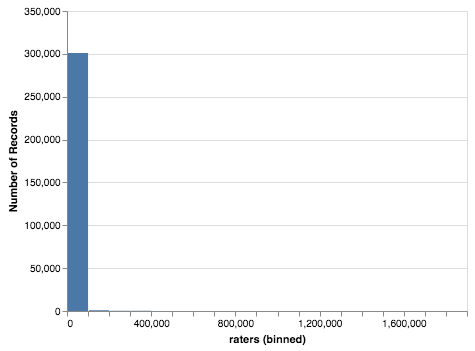

In [7]:
Chart(data).mark_bar().encode(
    x = X('raters', bin = Bin( maxbins = 20)),
    y = 'count(*):Q',
)

Looks like almost every rating is a very small number. What's the real curve look like? Can we get a bin?

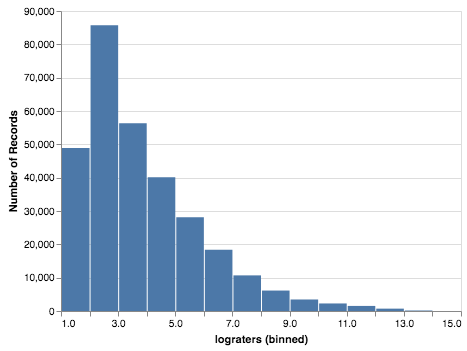

In [8]:
data['lograters'] =  data['raters'].map(  lambda x : log(x))
Chart(data).mark_bar().encode(
    x = X('lograters', bin = Bin( maxbins = 20)),
    y = 'count(*):Q',
)

In [9]:
medianraters = data['raters'].median()
topquarter = data['raters'].quantile ( q= 0.75)

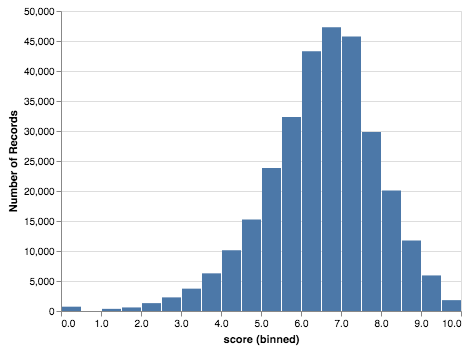

In [11]:
Chart(data).mark_bar().encode(
    x = X('score', bin = Bin( maxbins = 20)),
    y = 'count(*):Q',
)

Sanity check: is there a correlation between score & # of raters? That would seem to be biasing.

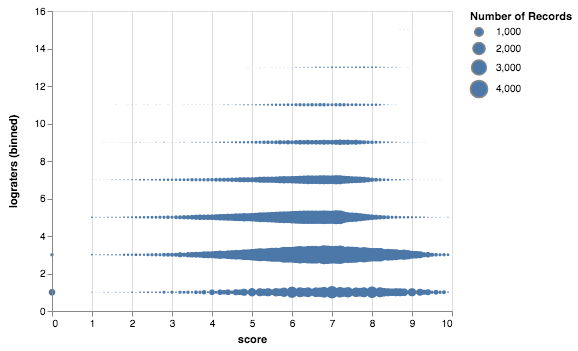

In [13]:
Chart(data).mark_circle().encode( 
       x = X('score'),
       y = Y('lograters', bin = Bin(maxbins = 10)),
       size = 'count(*):Q'
)

In [16]:
smalldata = data['score'] > topquarter